In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn import datasets

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
housing = fetch_california_housing()

In [5]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
housing_data = pd.DataFrame(housing.data,columns=housing.feature_names)

In [8]:
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
housing_target = pd.DataFrame(housing.target,columns=housing.target_names)

In [10]:
housing_target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [11]:
housing_data = pd.concat([housing_data,housing_target],axis=1)

In [12]:
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
housing_data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [15]:
housing_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


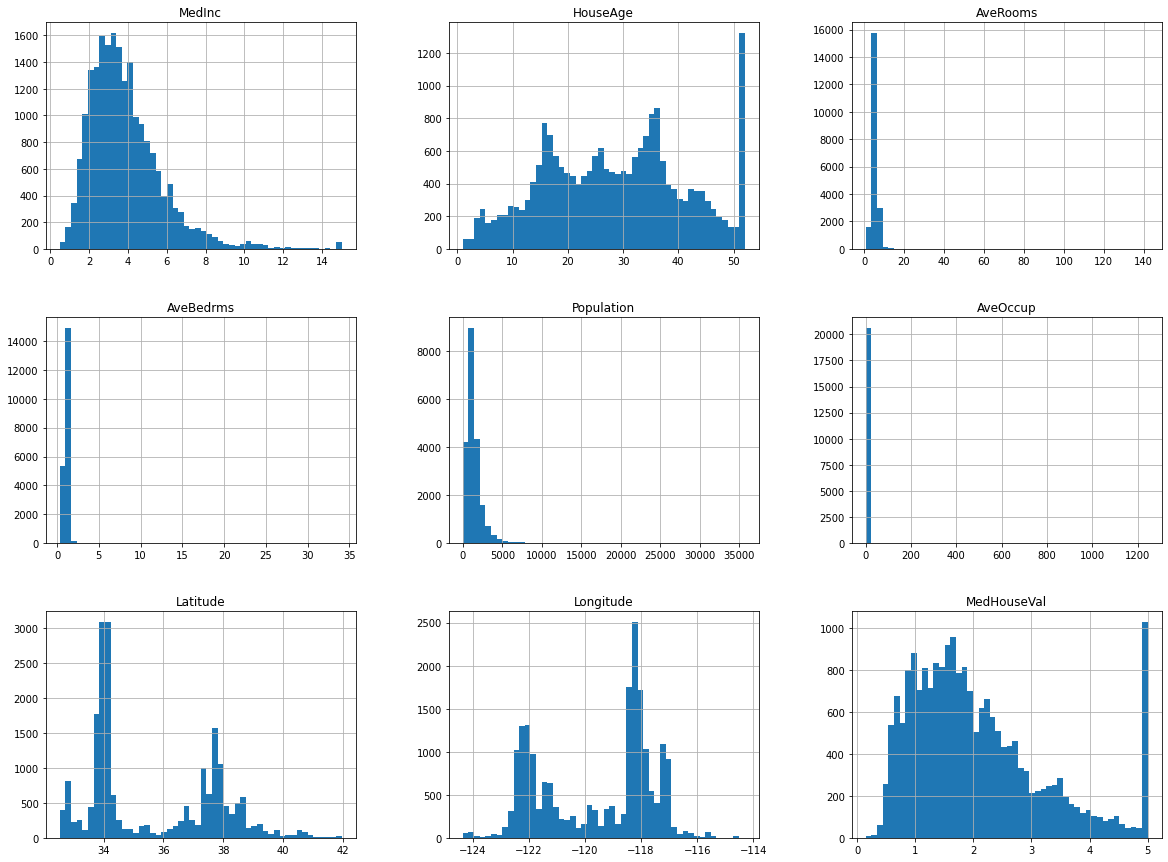

In [16]:
housing_data.hist(bins=50,figsize=(20,15))
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_data, test_size = 0.2, random_state = 20)

In [18]:
housing_data.shape

(20640, 9)

In [19]:
train_set.shape


(16512, 9)

In [20]:
test_set.shape

(4128, 9)

In [21]:
corr_matrix = housing_data.corr()

In [22]:
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

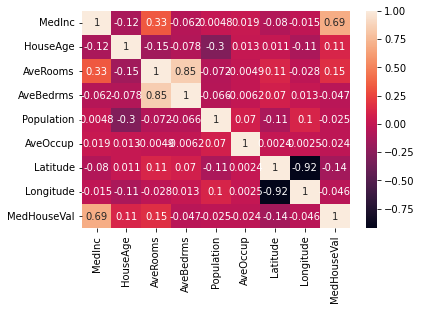

In [23]:
sns.heatmap(corr_matrix,annot = True)

In [24]:
corr_matrix['MedHouseVal'].sort_values(ascending = False) 

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

In [25]:
attributes = ['MedHouseVal','MedInc','AveRooms','HouseAge']

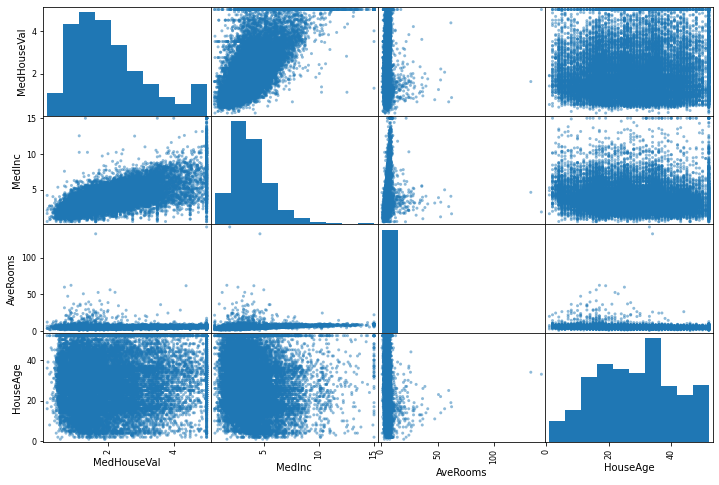

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing_data[attributes],figsize = (12,8))
plt.show()

In [27]:
housing_data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [28]:
x = housing_data.drop(['Latitude','Longitude','AveBedrms','Population','AveOccup'],axis = 1)

In [29]:
y = housing_data[['MedHouseVal']]

In [30]:
x.shape

(20640, 4)

In [31]:
y.shape

(20640, 1)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit_transform(x)

array([[ 2.34476576,  0.98214266,  0.62855945,  2.12963148],
       [ 2.33223796, -0.60701891,  0.32704136,  1.31415614],
       [ 1.7826994 ,  1.85618152,  1.15562047,  1.25869341],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, -0.99274649],
       [-1.05458292, -0.84539315, -0.04021111, -1.05860847],
       [-0.78012947, -1.00430931, -0.07044252, -1.01787803]])

In [35]:
x.shape

(20640, 4)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 20)

In [37]:
x_test.shape

(4128, 4)

In [38]:
y_train.shape

(16512, 1)

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
model = DecisionTreeRegressor(max_depth = 2)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [41]:
y_pred = model.predict(x_test)

In [42]:
print("Training Sscore : ", model.score(x_train,y_train))

Training Sscore :  0.9215258737433581


In [43]:
from sklearn.metrics import r2_score

In [44]:
print("Testing Score : ", r2_score(y_test,y_pred))

Testing Score :  0.9256834742058065
